##선도계약옵션(Forward Start Option) 구현
Forward Start Option은 미래의 특정 시점에서 옵션이 시작되며, 옵션의 행사가격이 그 시점의 기초 자산 가격에 의해 결정됩니다.

In [2]:
import matplotlib.font_manager as fm

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


Forward Start Option의 현재 가치: 22.53


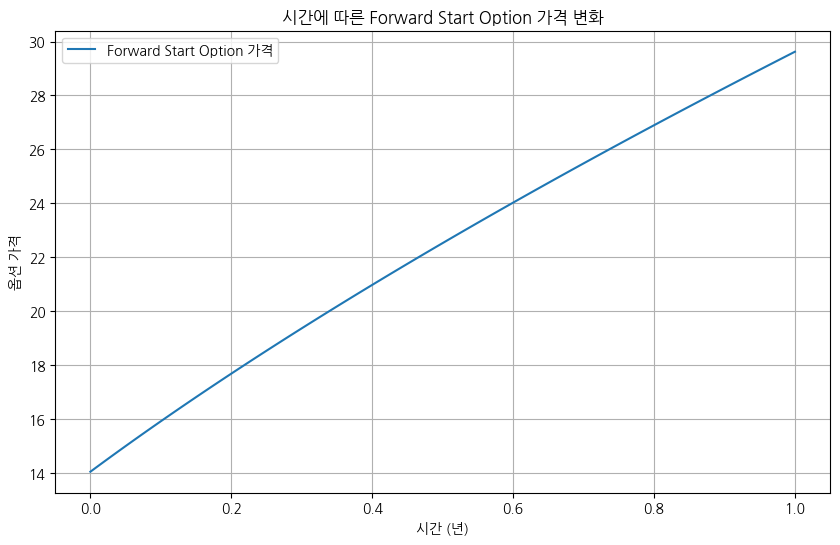

Forward Start Option의 현재 가치: 22.53


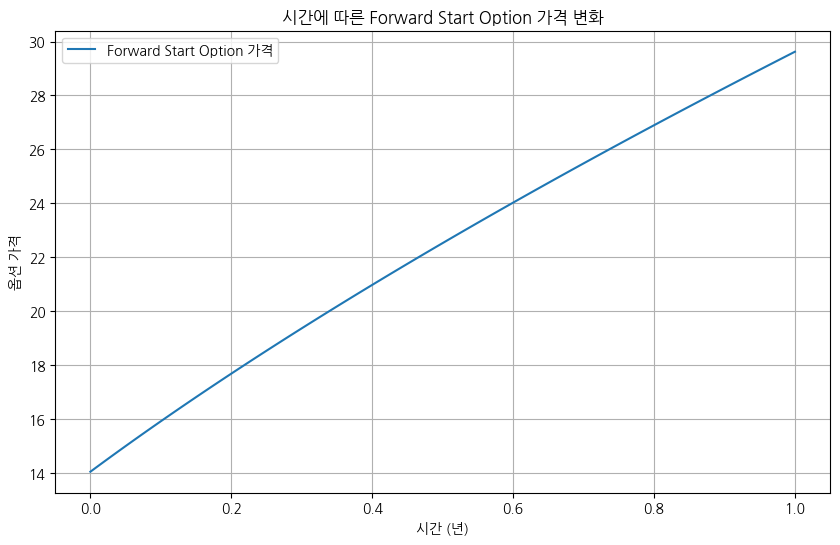

In [3]:
import numpy as np
from scipy.stats import norm
import yfinance as yf
import matplotlib.pyplot as plt

# 블랙-숄즈 모델을 사용하여 옵션 가격을 계산하는 함수
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Forward Start Option의 현재 가치 계산 함수
def forward_start_option_price(S, T1, T2, r, sigma):
    """
    S: 현재 기초 자산 가격
    T1: 현재 시점부터 선도 계약 시작 시점까지의 시간 (년 단위)
    T2: 선도 계약 시작 시점부터 옵션 만기까지의 시간 (년 단위)
    r: 무위험 이자율
    sigma: 변동성
    """
    T = T1 + T2  # 총 기간

    # Forward Start Option의 행사가격은 선도계약 시작 시점의 기초 자산 가격으로 설정
    K = S * np.exp(r * T1)  # 선도 가격

    # Forward Start Option의 현재 가격 계산
    forward_start_price = black_scholes_call(S, K, T, r, sigma)

    return forward_start_price

# 실제 데이터 가져오기
# Apple Inc. 주가 데이터
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="1y")
S = apple_data['Close'].values[-1]  # 현재 주가

# 기본 변수 설정
T1 = 0.5  # 선도 계약 시작 시점까지의 시간 (0.5년)
T2 = 0.5  # 선도 계약 시작 시점부터 옵션 만기까지의 시간 (0.5년)
r = 0.05  # 무위험 이자율 (5%)
sigma = np.std(np.log(apple_data['Close'] / apple_data['Close'].shift(1)).dropna()) * np.sqrt(252)  # 변동성

# Forward Start Option의 현재 가치 계산
forward_start_price = forward_start_option_price(S, T1, T2, r, sigma)
print(f"Forward Start Option의 현재 가치: {forward_start_price:.2f}")

# 시각화
time_horizon = np.linspace(0, T1 + T2, 100)
option_prices = [forward_start_option_price(S, T1, t, r, sigma) for t in time_horizon]

plt.figure(figsize=(10, 6))
plt.plot(time_horizon, option_prices, label='Forward Start Option 가격')
plt.xlabel('시간 (년)')
plt.ylabel('옵션 가격')
plt.title('시간에 따른 Forward Start Option 가격 변화')
plt.legend()
plt.grid(True)
plt.show()
import numpy as np
from scipy.stats import norm
import yfinance as yf
import matplotlib.pyplot as plt

# 블랙-숄즈 모델을 사용하여 옵션 가격을 계산하는 함수
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Forward Start Option의 현재 가치 계산 함수
def forward_start_option_price(S, T1, T2, r, sigma):
    """
    S: 현재 기초 자산 가격
    T1: 현재 시점부터 선도 계약 시작 시점까지의 시간 (년 단위)
    T2: 선도 계약 시작 시점부터 옵션 만기까지의 시간 (년 단위)
    r: 무위험 이자율
    sigma: 변동성
    """
    T = T1 + T2  # 총 기간

    # Forward Start Option의 행사가격은 선도계약 시작 시점의 기초 자산 가격으로 설정
    K = S * np.exp(r * T1)  # 선도 가격

    # Forward Start Option의 현재 가격 계산
    forward_start_price = black_scholes_call(S, K, T, r, sigma)

    return forward_start_price

# 실제 데이터 가져오기
# Apple Inc. 주가 데이터
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="1y")
S = apple_data['Close'].values[-1]  # 현재 주가

# 기본 변수 설정
T1 = 0.5  # 선도 계약 시작 시점까지의 시간 (0.5년)
T2 = 0.5  # 선도 계약 시작 시점부터 옵션 만기까지의 시간 (0.5년)
r = 0.05  # 무위험 이자율 (5%)
sigma = np.std(np.log(apple_data['Close'] / apple_data['Close'].shift(1)).dropna()) * np.sqrt(252)  # 변동성

# Forward Start Option의 현재 가치 계산
forward_start_price = forward_start_option_price(S, T1, T2, r, sigma)
print(f"Forward Start Option의 현재 가치: {forward_start_price:.2f}")

# 시각화
time_horizon = np.linspace(0, T1 + T2, 100)
option_prices = [forward_start_option_price(S, T1, t, r, sigma) for t in time_horizon]

plt.figure(figsize=(10, 6))
plt.plot(time_horizon, option_prices, label='Forward Start Option 가격')
plt.xlabel('시간 (년)')
plt.ylabel('옵션 가격')
plt.title('시간에 따른 Forward Start Option 가격 변화')
plt.legend()
plt.grid(True)
plt.show()
